## Look at calibrated spectra
Glen Langston, NSF, 2021 October 27
### After calibration and selecting the low galactic latitude data, the averages are saved in a sub-directory
Now check the calibration and velocities saved

In [1]:
datadir = "./keep/"
!ls {datadir}

ls: ./keep/: No such file or directory


In [2]:
# Import the processing routines
import ras

In [3]:
p = ras.Plot(datadir)

In [4]:
p.raw(datadir)

Ploting Intensity versus Frequency
Not a valid file name: ./keep/
Date: 2022-02-07
No Plots, exiting


In [5]:
p.Help("-V "+datadir)

['./keep/']

In [6]:
p.raw(datadir)

Ploting Intensity versus Velocity
Not a valid file name: ./keep/
No Plots, exiting


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [8]:
# Retrieve the data from the lastest plot
x_array = p.xv
y_array = p.yv
bunit = "Kelvins"
print("Length of arrays to fit: %d, %d" % (len(x_array),len(y_array)))
xunit = "MHz"
if not p.plotFrequency:
    xunit = "km/sec"
print("X min, max: %8.3f, %8.3f (%s)" % (np.min(x_array), np.max(x_array), xunit))
print("Y min, max: %8.3f, %8.3f (%s)" % (np.min(y_array), np.max(y_array), bunit))

# prepare to fit a guassian
ymax = np.amax(y_array)
imax = np.argmax(y_array)

xmax = x_array[imax]
sigma1 = 10.

amp1 = xmax
cen1 = ymax
amp2 = xmax*.9
cen2 = cen1*.9
sigma2 = sigma1
amp3 = xmax*.9
cen3 = cen1*1.1
sigma3 = sigma1
# Print gaussian input guess
print("Gaussian estimate; X,Y,Sigma: %.2f, %.2f, %.2f" % (amp1, cen1, sigma1))

Length of arrays to fit: 128, 128
X min, max:    0.000,    0.000 (km/sec)
Y min, max:    0.000,    0.000 (Kelvins)
Gaussian estimate; X,Y,Sigma: 0.00, 0.00, 10.00


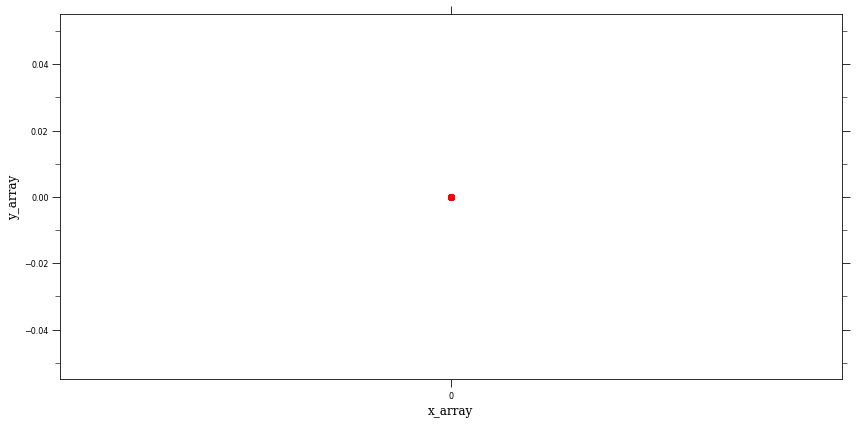

In [9]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro")

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)

In [10]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

In [11]:
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x_array, y_array, p0=[amp1, cen1, sigma1])

perr_gauss = np.sqrt(np.diag(pcov_gauss))

/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [12]:
# this cell prints the fitting parameters with their errors
print("amplitude = %0.2f (+/-) %0.2f" % (popt_gauss[0], perr_gauss[0]))
print("center = %0.2f (+/-) %0.2f" % (popt_gauss[1], perr_gauss[1]))
print("sigma = %0.2f (+/-) %0.2f" % (popt_gauss[2], perr_gauss[2]))

y_fit =  _1gaussian(x_array, *popt_gauss)
y_fit_max = y_fit[imax]
print("Gaussian value at the location of the data max: %.2f" % (y_fit_max))

amplitude = 0.00 (+/-) inf
center = 0.00 (+/-) inf
sigma = 10.00 (+/-) inf
Gaussian value at the location of the data max: 0.00


In [13]:
# now plot the data with the gaussian fit

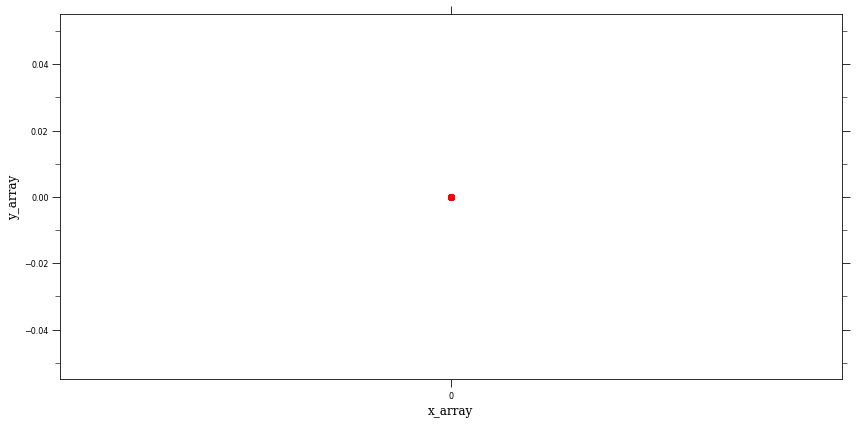

In [14]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro", label="Data")
ax1.plot(x_array, _1gaussian(x_array, *popt_gauss), 'k--', label="Fit")#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fitGaussian.png", format="png",dpi=1000)

In [15]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

In [16]:
popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array, p0=[amp1, cen1, sigma1, \
                                                                                          amp2, cen2, sigma2])

perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)

/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [17]:
# next plot the dual gaussian fit

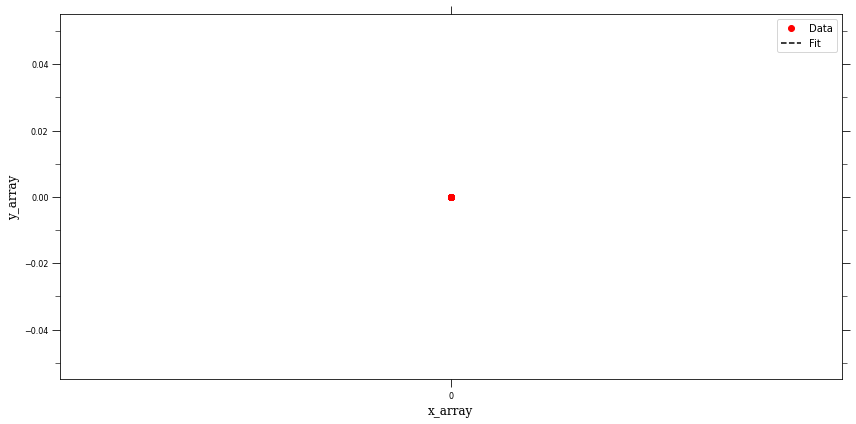

In [18]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro", label="Data")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--', label="Fit")#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian.png", format="png",dpi=1000)

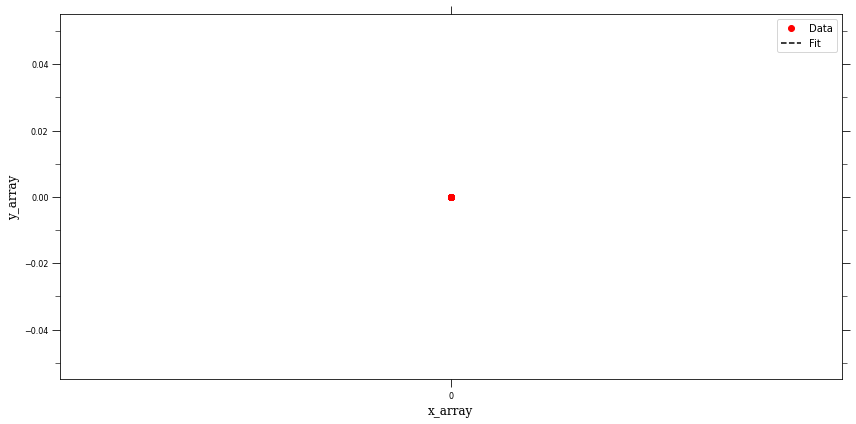

In [19]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro", label="Data")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--', label="Fit")#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian_peaks.png", format="png",dpi=1000)

In [20]:
# this cell prints the fitting parameters with their errors
print("-------------Peak 1-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_2gauss[0]))
print("center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], perr_2gauss[2]))
print("area = %0.2f" % np.trapz(gauss_peak_1))
print("--------------------------------")
print("-------------Peak 2-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_2gauss[3]))
print("center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], perr_2gauss[5]))
print("area = %0.2f" % np.trapz(gauss_peak_2))
print("--------------------------------")

-------------Peak 1-------------
amplitude = 0.00 (+/-) inf
center = 0.00 (+/-) inf
sigma = 10.00 (+/-) inf
area = 0.00
--------------------------------
-------------Peak 2-------------
amplitude = 0.00 (+/-) inf
center = 0.00 (+/-) inf
sigma = 10.00 (+/-) inf
area = 0.00
--------------------------------


In [21]:
# Compute difference between the two gaussian model and observations

In [22]:
residual_2gauss = y_array - (_2gaussian(x_array, *popt_2gauss))

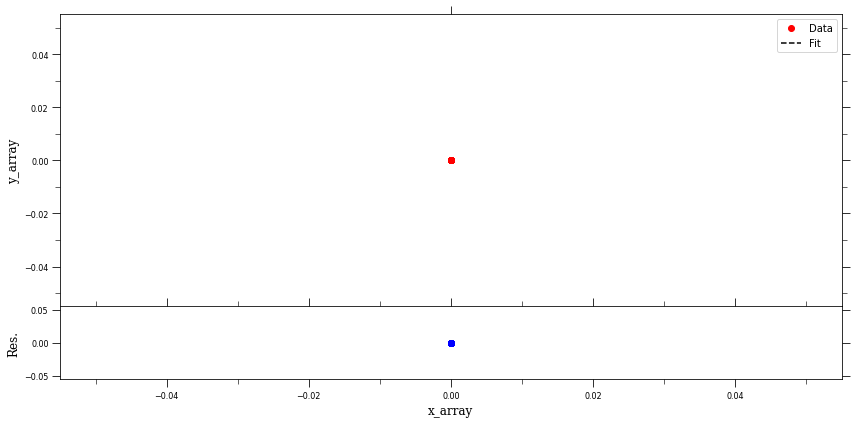

In [23]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0) 

ax1.plot(x_array, y_array, "ro", label="Data")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--', label="Fit")#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  

# residual
ax2.plot(x_array, residual_2gauss, "bo")

ax2.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)
ax2.set_ylabel("Res.",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.tick_params(axis='x',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='x',which='minor', direction="out", top="on", right="on", bottom="off", length=5, labelsize=8)
ax1.tick_params(axis='y',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='y',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

ax2.tick_params(axis='x',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='x',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)
ax2.tick_params(axis='y',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='y',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian_peaks_resid.png", format="png",dpi=1000)

# Congratulations
### You've examined the emission from the Galactic Plane and found the Velocity of the Arms of the Milky Way